# Graph Theory Introduction

## Try me
 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/MIP/tutorials/Networkx%20Tutorial.ipynb)[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FMIP%2Ftutorials%2FNetworkx%20Tutorial.ipynb)

## Introduction
This notebook provides an overview and tutorial of [Networkx](https://networkx.org/), a Python package to create, manipulate, and analyse graphs with an 
extensive set of algorithms to solve common graph theory problems. 
Basically, we will use Networkx to build a network model of the network, and present some of the most important algorithms 
to solve the problems covered in the book, and finally we will see some nice add-ons and tools to draw networks and create 
networks from other data structures such as open maps!

## Requirements

You need to install Networkx in your runtime, so make sure you run this script if not already installed. 

Note that the install line includes the *extra* option to install additional packages which are useful to work with 
Networkx.

In [ ]:
!pip install networkx[default, extra]
!pip install ipython
!pip install pandas

## Use
### Import
We are going to import the package as *nx* in this tutorial:

In [1]:
import networkx as nx

## The basics
### Creating networks
We can create different types of graphs with the following constructor functions. Review the definitions in the [Graph theory tutorial](Graph%20theory.ipynb):

- ```nx.Graph```: Creates an object representing an undirected graph.
- ```nx.DiGraph```: Creates an object representing a directed Graph
- ```nx.MultiGraph:``` Creates an object representing a with multiple edges between any pair of nodes
- ```nx.MultiDiGrpah:``` Directed graph with multiple edges between any pair of nodes

By default, graphs are created without nodes or edges. The simplest way to add edges and nodes is to use the class methods 
 ```add_node``` and ```add_edge```. The former adds the object that is passed as argument as a node of the graph. We can 
add as a node a string variable, a numeric, or a tuple with several values which are relevant for our 
application. In fact, we can add any *hashable* object, any object that will not change during the execution of the 
program. Functions and objects of user-defined classes are also hashable by default. You can find the precise definition 
of hashable in the [glossary](https://docs.python.org/3/glossary.html), but what is important is that Python can assign 
a unique identifier to each hashable object, and networkx uses these feature to identify each node of the network. 
Normally, we will use simple types like strings or integers, with different values for each node. 
The function ```add_edge``` creates and edge passing between two objects are arguments. If the objects are already in 
the network, it will create an edge between the two, as long as the type of network allows it (if not, it will raise an 
exception). If any of the objects passed as arguments are not in the network, the function will also add them as nodes. 
For instance:

In [2]:
# Create an undirected graph
my_first_Graph = nx.Graph()

# Add and edge between nodes 1, 2. Automatically creates nodes 1 and 2
my_first_Graph.add_edge(1, 2)

# Add a third node
my_first_Graph.add_node(3)

We can add attributes to the edges. We can define as many attributes as we want and pass them as named arguments to the 
```add_edge``` function, for instance:

In [6]:
# add another edge with weight 3 between nodes 2 and 3.
my_first_Graph.add_edge(2, 3, weight=3)

Graph properties describe the structure of the graph, for instance, the list of nodes and edges. Some important properties
are:
- ```nodes```: Provides a list containing the nodes of the graph. Each element of the list is the object used to add a node.
- ```edges```: Provides the list of the edges of the graph. Each edge is represented as a tuple where the first element 
is the object that represents the origin node and the second element is the object that represents the destination node.
- ```adjacency```: The adjacency provides a dictionary containing the information in the adjacency matrix. Normally, 
the adjacency matrix will be sparse (containing lots of zeroes) and, for the sake of efficiency, networkx represents the 
adjacency as a dictionary where the node objects are keys and the values are dictionaries with the information of the 
edges with origin at the key node. The information of the edges are also dictionaries, where each key is the destination 
 node object and the values are dictionaries with the attributes of the edge (see example below).
- ```degree```: The degree of each node of the graph is represented as a tuple where the first element is the node object 
and the second element an integer with the degree of the graph. 
``` size() ```: The size of the graph (integer)
``` order() ```: The order of the graph (integer)

Let`s see these properties with the example above:

In [7]:
# The nodes property contains a list of nodes
print(my_first_Graph.nodes)

# The edges:
print(my_first_Graph.edges)

# The adjacency:
print(my_first_Graph.adj)

# Or the order:
print(my_first_Graph.order())

#Or the size:
print(my_first_Graph.size())

#Or the degree
print(my_first_Graph.degree)

[1, 2, 3]
[(1, 2), (2, 3)]
{1: {2: {}}, 2: {1: {}, 3: {'weight': 3}}, 3: {2: {'weight': 3}}}
3
2
[(1, 1), (2, 2), (3, 1)]


### Algorithms
Networkx has an extensive library of algorithms to solve graph theory problems. 
#### Path algorithms
It packages several algorithms to compute paths, shortest paths and path lengths between nodes in a graph. The 
algorithms work both on directed and undirected graphs. Basically, they all take as arguments the graph, the source and 
target nodes, and the optionally the edge attribute that represents the distance, cost or weight of each edge. If not 
provided, all edges have a weight equal to one
##### shortest_path
shortest_path computes the shortest paths in the graph. By default, it uses the Dijkstra algorithm, but it is possible 
to use Bellman-Ford's algorithm using the argument ```method = ‘bellman-ford’```. 
If only the source node is specified, shortest_path returns a dictionary keyed by targets with the shortest path between 
 the source node and every other node in the network. Conversely, if only the target is specified, it return a 
 dictionary keyed by sources with the shortest path from every node to the specified target node. If neither the source 
nor target are specified, it returns a dictionary of dictionaries with all shortest paths from every source and every 
target node.

In [ ]:
# Create a directed graph structure: 
G = nx.DiGraph()

G.add_edge(0,1, cost=1700)
G.add_edge(0,2, cost=3968)
G.add_edge(0,3, cost=7622)
G.add_edge(0,4, cost=10970)
G.add_edge(1,2, cost=1880)
G.add_edge(1,3, cost=1880)
G.add_edge(1,4, cost=4652)
G.add_edge(2,3, cost=2300)
G.add_edge(2,4, cost=4316)
G.add_edge(3,4, cost=2720)

# Get shortest path between nodes 0 and 4:
g_shortest_paths = nx.shortest_path(G, 0, 4, weight='cost')
print(g_shortest_paths)

#### minimum_spanning_tree
minimum_spanning_tree returns the minimum spanning tree of an undirected graph. Recall that the minimum spanning tree is
a sub-graph that connects all the nodes in the graph with the minmum sum of edge weights.
If the graph is not connected, the function returns a collection of the minimum spanning trees of each connected sub-graph.
This is refer to as a spanning forest.


In [2]:
G = nx.Graph()
G.add_node("a")
G.add_node("d")
G.add_edge("a", "b", weight=3)
G.add_edge("a", "c", weight=6)
G.add_edge("b", "d", weight=1)
G.add_edge("c", "d", weight=2)
T = nx.minimum_spanning_tree(G)
print(T.edges)

[('a', 'b'), ('d', 'b'), ('d', 'c')]


#### Flow algorithms
##### maximum_flow
maximum_flow finds a maximum flow of a commodity in a directed graph where each node has a 'capacity' attribute that 
specifies the maximum capacity that the flow can support. It returns the value of the flow and the path that provides 
the maximum flow in a dictionary keyed with the source and destination nodes. See the example below:


In [ ]:
G = nx.DiGraph()
G.add_edge("x", "a", capacity=3.0)
G.add_edge("x", "b", capacity=1.0)
G.add_edge("a", "c", capacity=3.0)
G.add_edge("b", "c", capacity=5.0)
G.add_edge("b", "d", capacity=4.0)
G.add_edge("d", "e", capacity=2.0)
G.add_edge("c", "y", capacity=2.0)
G.add_edge("e", "y", capacity=3.0)

flow_value, flow_dict = nx.maximum_flow(G, "x", "y")
print(flow_value)
print(flow_dict)

##### min_cost_flow
G is a directed graph with edge capacity and in which nodes have demand, maximum_flow_value finds a maximum flow from a 
source node to a destination node, using the node s to node s, using edge attribute ‘capacity’ as edge capacity and node 
attribute 'demand' as the demand.  negative demand means that the node wants to send flow, a positive demand means that 
the node want to receive flow. A flow on the digraph G satisfies all demand if the net flow into each node is equal to 
the demand of that node.

In [ ]:
G = nx.DiGraph()
G.add_node("a", demand=-5)
G.add_node("d", demand=5)
G.add_edge("a", "b", weight=3, capacity=4)
G.add_edge("a", "c", weight=6, capacity=10)
G.add_edge("b", "d", weight=1, capacity=9)
G.add_edge("c", "d", weight=2, capacity=5)
flowDict = nx.min_cost_flow(G)


### Displaying networks
You can draw the graph with the function ```draw(G, pos)```. The function takes a graph as the first argument. 
The second argument is a tuple with the relative (x, y) coordinates of nodes in the graph. 

Networkx provides convenient functions to customise the representation of the network:
- The function ```draw_networkx_labels``` is used to control the presentation of the node labels (reference [here](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html) 
- The function ```draw_networkx_nodes```to control the presentation of the nodes (reference here)
- The function ```draw_networkx_edge_labels``` to control the edge labels (reference here). 

See a practical example below:

{(1, 2): Text(0.5, 0.0, '0'), (2, 3): Text(1.5, 0.0, '3')}

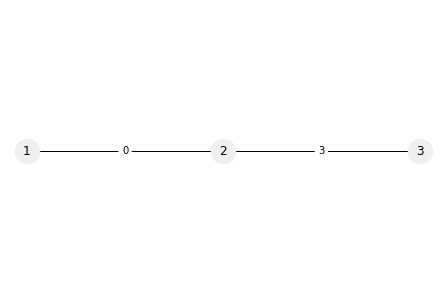

In [8]:
pos = {1: (0, 0), 
       2: (1, 0),
       3: (2, 0)}
nx.draw(my_first_Graph, pos)
nx.draw_networkx_labels(my_first_Graph, pos)
nx.draw_networkx_nodes(my_first_Graph, pos, node_size=600, node_color='#efefef')
nx.draw_networkx_edge_labels(my_first_Graph, pos, edge_labels={(1, 2): 0, (2, 3): 3})



## Creating networks from datasets
### Add edges from edge list
Networkx provides convenient functions and methods to create networks from large data structures. This is necessary to 
build networks in practical applications. This section covers functions to create graphs from iterables and Pandas data frames.


Specifically, The method ```add_edges_from``` adds edges from an array where 
each element is a tuple (*edge tuple*) with the following elements:
- origin node object
- destination node object
- (optional) dictionary with edge properties


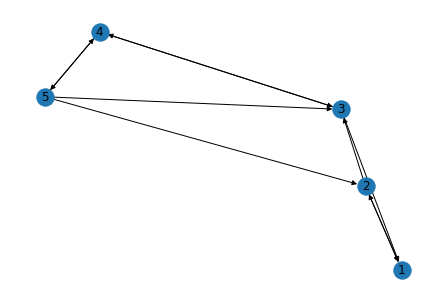

In [16]:
my_graph = nx.DiGraph()
my_edges = [(1, 2, {"weight": 3, "capacity": 5}), # adds an edge from node 1, to node 2, with weight 3 and capacity 5
            (2, 1, {"weight": 2, "capacity": 4}),
            (2, 3, {"weight": 3, "capacity": 6}),
            (3, 1, {"weight": 3, "capacity": 6}),
            (3, 4, {"weight": 2, "capacity": 5}),
            (4, 3, {"weight": 5, "capacity": 8}),
            (4, 5, {"weight": 6, "capacity": 7})
            ]

my_graph.add_edges_from(my_edges)

# Add several nodes with same weight and capacity:
my_graph.add_edges_from([(5,4), (5, 2), (5, 3)], weight=5, capacity= 9)

# Draw with spring layout
nx.draw_spring(my_graph, with_labels=True)

### Adding paths from lists
It is also possible to add paths to a graph using an array that contains the list of nodes in the path.
If the nodes do not exists in the graph, they are automatically added. It is possible to define properties for the edges 
added to the path. let us see it in action:

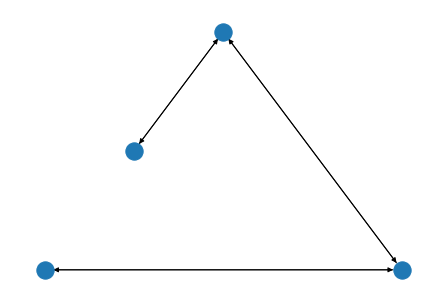

In [17]:
my_graph = nx.DiGraph()

path_1 = [1, 2, 3, 4]
# Add a path 1 -> 2 -> 3 4 with weight 3
nx.add_path(my_graph, path_1, weight = 3)

# Add a reverse path with weight 4
path_2 = [4, 3, 2, 1]
nx.add_path(my_graph, path_2, weight = 4)

nx.draw_planar(my_graph)

### Adding cycles from list
The function ```add_cycle``` adds a cycle connecting the nodes provided in an array. It is similar to ```add_path```, 
except that the first and the last node are connected: 




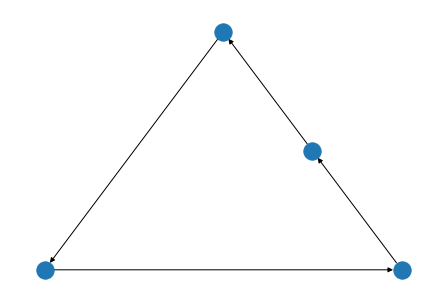

In [18]:
my_graph = nx.DiGraph()

path_1 = [1, 2, 3, 4]
# Add a path 1 -> 2 -> 3 4 with weight 3
nx.add_cycle(my_graph, path_1, weight = 3)

nx.draw_planar(my_graph)


### Creating graphs from Pandas dataframes
#### from_pandas_edgelist
Networkx has a good integration with [Pandas](https://pandas.pydata.org/). The function ```from_pandas_edgelist``` 
creates a graph from a Pandas dataframe that contains the information of the edges. You only need to specify which column
specifies the origin node, the destination node and which columns contain information about the edges we want to map as 
attributes. The arguments are:
- edgelist: The dataframe containing the edge information
- source: The column that contains the source nodes
- Target: The column that contains the target nodes
- edge_attr: An array with the names of the columns that contain edge attributes


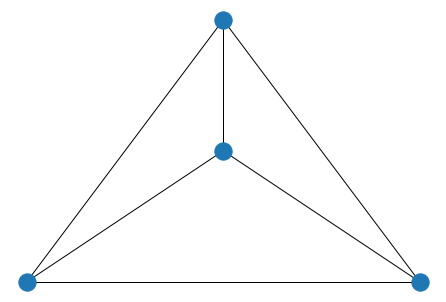

In [20]:
import pandas as pd
edge_df = pd.DataFrame({'u': [1, 2, 2, 3, 3, 4], 'v': [2, 3, 4, 1, 4, 1], 'weight': [2, 1, 3, 4, 2, 1]})

# Create a graph from the edge list
graph = nx.from_pandas_edgelist(edge_df, 'u', 'v', ['weight'])

nx.draw_planar(graph)

#### from_pandas_adjacency_matrix
It is also possible to create a graph from a Pandas dataframe that contains the adjacency matrix. An entry i,j in the 
 dataframe corresponds to the weight of an edge from node i to j. For directed graphs, it is necessary to use the 
 create_using argument equal to nx.Digraph:

In [ ]:
adjacency_matrix = pd.DataFrame([[0, 1, 0, 4, 0, 3], 
                                 [1, 0, 1, 0, 0, 7],
                                 [0, 0, 0, 1, 0, 8],
                                 [8, 0, 2, 0, 2, 5], 
                                 [9, 0, 7, 2, 0, 1],
                                 [0, 0, 0, 1, 0, 0]])

graph = nx.from_pandas_adjacency(adjacency_matrix, create_using=nx.DiGraph)

print(graph.nodes)
print(graph.adj)


### Export data to Pandas dataframe
The functions ```to_pandas_adjacency``` and ```to_pandas_edgelist``` export the information of the graph to dataframes, 
either as the adjancency matrix or as an edge list (make sure you run the cell above):

In [ ]:
df = nx.to_pandas_edgelist(graph)
df


### Creating networks from Open Street Maps data
[osmnx](https://osmnx.readthedocs.io/en/stable/) is a really nice package that allows to create a map from Open Street 
Map data, which is a really nice resource in logistics applications.

#### Installation
Run the following script to install onsmnx if it is not installed in your system:

In [2]:
!apt-get -qq install -y libspatialindex-dev && pip install -q -U osmnx import osmnx as ox ox.config(use_cache=True, log_console=True)

"apt-get" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


#### Creating a map
You can create a network from a map using three functions: 
- ```graph_from_place```: Creates a network map from a search query to Open Street Maps. For instance, the query ```'Valencia, VC, Spain'```
 returns a network of the street map of the city of Valencia. There are some requirements to build these queries, and if
 it does not work in your app, you can use any of the other two methods described in this section.
- ```graph_from_address```: Creates a network map centered  providing an address. The argument ```address``` specifies 
the address to geocode and use as the central point around which the graph is constructed. The argument ```dist``` 
specifies the maximum distance from the center address to any node in the graph. 
- ```graph_from_bbox```: Creates a graph within four points of a bounding box, specifying the ```north``` northern 
latitude of the bounding box, the ```south``` southern latitude of bounding box, the ```east``` eastern longitude of 
the bounding box and the ```west``` western longitude of the bounding box.

In [4]:
import networkx as nx
import osmnx as ox
# get two markers from google maps around EDEM
# Latitude, Longitude
#North-west marker
# 39.468370277652426, -0.33528989341188187
# South east marker
# 39.45963084307057, -0.3184406656568226
G_nx = ox.graph_from_bbox(north=39.468370277652426, 
                          south=39.45963084307057, 
                          east=-0.3184406656568226, 
                          west=-0.33528989341188187)

#### Rendering the map
The function plot_graph_folium uses [Folium](https://python-visualization.github.io/folium/) to render the map in an 
interactive map:

In [5]:
ox.plot_graph_folium(G_nx)

#### get_nearest_node
When you work on a graph, you can possibly click on a point in the map that is not necessarily an edge in the graph, so 
to be able to process it, you first need to find the node in the graph that is closest to the point. You can use the 
get_nearest_point function for this purpose, it returns the node that is closest to the point you pass as an argument so 
that you can later use the algorithms:

In [ ]:
edem = (39.46211739713285, -0.3288013882525529)
nearest_node = ox.get_nearest_node(G_nx, edem)

